In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset

In [169]:
dataset = pd.read_csv('titanic.csv')

In [170]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
def get_surname(x):
    x['Surname'] = x.Name.split(',')[0]
    return x

In [172]:
dataset = dataset.apply(get_surname, axis=1)

In [173]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [174]:
dataset.Cabin.fillna('-', inplace=True)

In [175]:
dataset.Embarked.fillna('-', inplace=True)

In [176]:
dataset.drop(columns=['PassengerId', 'Name'], inplace=True)

## Label encoder

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
categorical_feature_mask = dataset.dtypes==object
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

In [179]:
le = LabelEncoder()

In [180]:
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))           

In [181]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,0,3,1,22.0,1,0,523,7.2500,0,3,73
1,1,1,0,38.0,1,0,596,71.2833,82,1,136
2,1,3,0,26.0,0,0,669,7.9250,0,3,251
3,1,1,0,35.0,1,0,49,53.1000,56,3,198
4,0,3,1,35.0,0,0,472,8.0500,0,3,11


In [182]:
X = dataset.drop(columns=['Survived']).values

In [183]:
y = dataset.Survived.values

# SOM

In [184]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [185]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 10, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

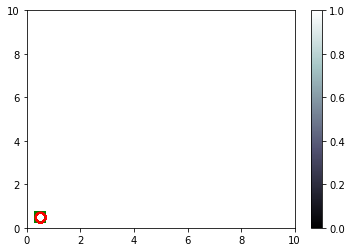

In [186]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(7,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)